# Project 2

## Overview

### Yêu cầu

**Có 3 bảng dữ liệu excel**: location, mode, order.                                            
**Yêu cầu**:
1. Mô tả lại những vấn đề của dữ liệu nếu có
2. Trình bày quá trình xử lý dữ liệu.

### Data

***Table 1: location***
1. **id**: Mã của khu vực
2. **code**: Ký hiệu khu vực
3. **name**: Tên khu vực

***Table 2: mode***
1. **id**: Mã của hình thức học
2. **mode**: Hình thức học

***Table 3: order***
1. **id**: Mã của khách hàng
2. **created**: Ngày tạo
3. **cus_mail**: Mail khách hàng
4. **cus_name**: Tên khách hàng
5. **cus_mobi**: Số điện thoại khách hàng
6. **course_mode_id**: Mã của khóa học
7. **course_schedule**: Lịch trình khóa học
8. **payment_amount**: Số tiền thanh toán
9. **payment_status**: Trạng thái thanh toán
10. **cus_pic_id**: Mã ảnh của khách hàng
11. **lead_source**: Nguồn gốc của khách hàng tiềm năng
12. **payment_date**: Ngày thanh toán
13. **payment_method**: Phương thức thanh toán
14. **total_fee**: Tổng phí khóa học
15. **lead_id**: Mã của khách hàng tiềm năng
16. **actually_received**: Khoản thực tế đã nhận
17. **original_fee**: Phí gốc của khóa học
18. **cus_location_id**: Mã vị trí của khách hàng

## Thiết lập và đọc dữ liệu

### import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

*Sử dụng các thư viện dùng để phân tích và vẽ biểu đồ.*

### variable declaration

**Data folder**

In [2]:
data_path = 'data'

*Khai báo folder dữ liệu chứa 3 file dữ liệu cần phân tích.*

### Load data

In [3]:
def read_data(data_dir , str_cols =[], date_cols =[], date_fmt= None):
    dtype_dic = {i:str for i in str_cols}
    df = pd.read_excel(data_dir, dtype= dtype_dic)
    for i in date_cols:
        df[i] = pd.to_datetime(df[i], format= date_fmt)
    for i in date_cols:
        df[i] = df[i].dt.normalize()
    return df

- Tạo hàm read_data để đọc dữ liệu của 3 bảng excel Location, mode, order.
- Chuyển đổi các trường dụng về string.
- Chuyển đổi các trường date về dạng dd/mm/yy, time = 0:0.

***location***

In [4]:
loc_dir = os.path.join(data_path,'location.xlsx')
str_cols = ['id','code','name']
loc_df = read_data(loc_dir ,str_cols)
loc_df.rename(columns={'id': 'cus_location_id'}, inplace=True)
loc_df

,cus_location_id,code,name
0,1,HN,HÀ NỘI
1,2,HCM,HỒ CHÍ MINH
2,3,DN,ĐÀ NẴNG
3,4,HP,HẢI PHÒNG
4,5,TQ,TOÀN QUỐC


*Đọc file excel location từ folder data và hiển thị dữ liệu của file ta có: 5 dòng và 2 cột.*

*Đổi tên cột id của bảng thành cus_location_id để dễ nhận biết cột của bảng location.*

***mode***

In [5]:
mod_dir = os.path.join(data_path,'mode.xlsx')
str_cols = ['id','mode']
mod_df = read_data( mod_dir , str_cols )
mod_df.rename(columns={'id': 'course_mode_id'}, inplace=True)
mod_df

,course_mode_id,mode
0,1,OFFLINE TRỰC TIẾP
1,2,ONLINE TƯƠNG TÁC
2,3,KẾT HỢP ONLINE & OFFLINE
3,4,100% ONLINE VIDEO + SUPPORT


*Đọc file excel mode từ folder data và hiển thị dữ liệu của file ta có: 4 dòng và 2 cột.*

*Đổi tên cột id của bảng thành course_mode_id để dễ nhận biết cột của bảng mode.*

***order***

In [6]:
ord_dir = os.path.join(data_path,'order.xlsx')
str_cols = ['id','cus_mobi', 'course_mode_id','cus_location_id', 'cus_pic_id']
date_cols = ['created', 'payment_date']
ord_df = read_data( ord_dir , str_cols, date_cols)
ord_df.rename(columns={'id': 'cus_id'}, inplace=True)
ord_df

,cus_id,created,cus_mail,cus_name,cus_mobi,course_mode_id,course_schedule,payment_amount,payment_status,cus_pic_id,lead_source,payment_date,payment_method,total_fee,lead_id,actually_received,original_fee,cus_location_id
0,485,2022-01-02,thomashill@example.com,Norma Fisher,715-829-1898,3,012021,1500000,Fully-paid,1593,FB,2022-01-02,FB,1500000.0,NaN,1500000.0,NaN,2
1,486,2022-01-02,elliottveronica@example.net,Nicholas Nolan,001-650-531-2795x6441,NaN,012021,9000000,Fully-paid,1488,OT,2022-01-02,FB,9000000.0,NaN,9000000.0,NaN,1
2,487,2022-01-03,kimberly01@example.org,Mary Smith,+1-263-253-0184x042,2,012021,8500000,Fully-paid,919,GL,2022-01-03,FB,8500000.0,NaN,8500000.0,NaN,5
3,488,2022-01-04,tmoore@example.com,Kimberly Olsen,(237)212-1404,2,012021,8500000,Fully-paid,919,FB,2022-01-04,FB,8500000.0,NaN,8500000.0,NaN,5
4,489,2022-01-04,elizabethluna@example.com,William Green,945.879.9604,3,012021,14000000,Fully-paid,55,GL,2021-12-15,FB,14000000.0,NaN,14000000.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4299,5309,2023-12-29,ugriffith@example.net,Alex Martinez,227-443-4205,1,012024,3500000,Deposit,1659,FB,2023-12-20,GG,10200000.0,35050.0,3500000.0,17000000.0,2
4300,5310,2023-12-29,dturner@example.org,Elizabeth Carter,732.880.2985x4107,1,012024,12200000,Fully-paid,1659,FB,2023-12-20,GG,12200000.0,34395.0,12200000.0,17900000.0,1
4301,5311,2023-12-29,wkeller@example.com,Michelle Carter,318.916.0989,2,012024,4130000,Fully-paid,10421,FB,2023-12-29,GG,4130000.0,32833.0,4130000.0,6700000.0,5
4302,5312,2023-12-30,walkernicholas@example.com,Joe Krueger,(534)508-2460x00050,1,012024,3200000,Fully-paid,1659,TDF,2023-12-30,FB,3200000.0,35115.0,3200000.0,4000000.0,1


*Đọc file excel order từ folder data và hiển thị dữ liệu của file ta có: 4304 dòng và 18 cột.*

*Đổi tên cột id của bảng thành cus_id để dễ nhận biết cột của bảng order.*

## EDA

### location

In [7]:
print(loc_df.dtypes)
print(loc_df.isnull().sum())

cus_location_id    object
code               object
name               object
dtype: object
cus_location_id    0
code               0
name               0
dtype: int64


*Kiểm tra kiểu dữ liệu và kiểm tra giá trị missing: ta thấy file excel location không có vấn đề nào.*

### mode

In [8]:
print(mod_df.dtypes)
print(mod_df.isnull().sum())

course_mode_id    object
mode              object
dtype: object
course_mode_id    0
mode              0
dtype: int64


*Kiểm tra kiểu dữ liệu và kiểm tra giá trị missing: ta thấy file excel mode không có vấn đề nào.*

### order

In [9]:
print(ord_df.dtypes)
print(ord_df.isnull().sum())
print(ord_df.describe())

cus_id                       object
created              datetime64[ns]
cus_mail                     object
cus_name                     object
cus_mobi                     object
course_mode_id               object
course_schedule              object
payment_amount                int64
payment_status               object
cus_pic_id                   object
lead_source                  object
payment_date         datetime64[ns]
payment_method               object
total_fee                   float64
lead_id                     float64
actually_received           float64
original_fee                float64
cus_location_id              object
dtype: object
cus_id                  0
created                 0
cus_mail                0
cus_name                0
cus_mobi                0
course_mode_id       1419
course_schedule       269
payment_amount          0
payment_status         27
cus_pic_id              0
lead_source            41
payment_date           13
payment_method         49


*Kiểm tra kiểu dữ liệu và kiểm tra giá trị missing, outlier: ta thấy file excel order có giá trị missing.*

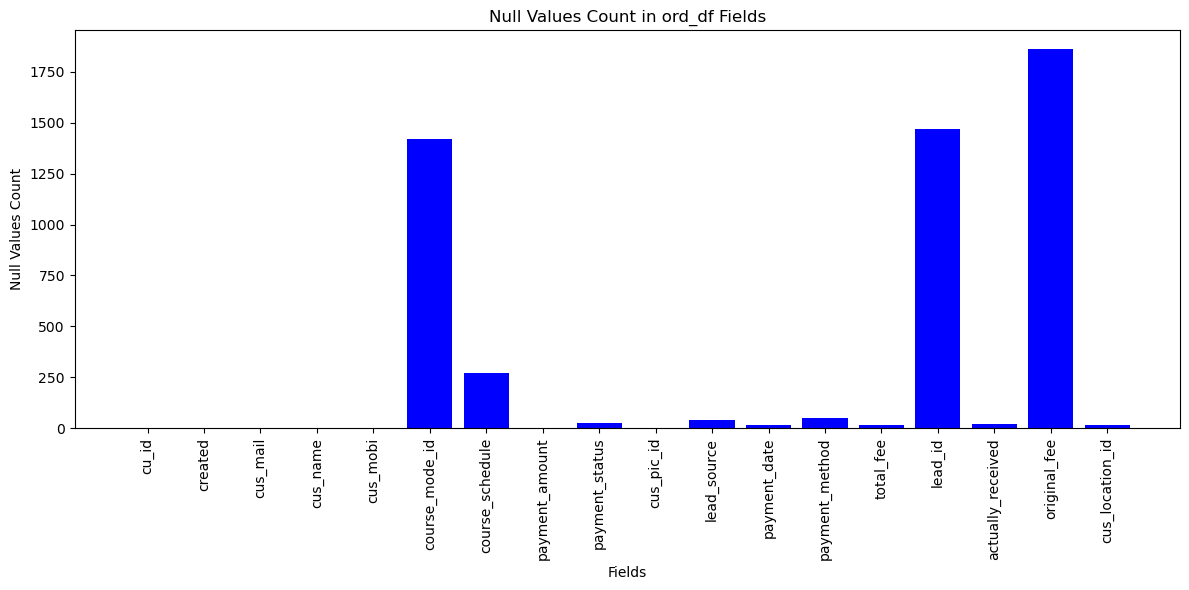

In [10]:
null_counts = {
    'cu_id': 0,
    'created': 0,
    'cus_mail': 0,
    'cus_name': 0,
    'cus_mobi': 0,
    'course_mode_id': 1419,
    'course_schedule': 269,
    'payment_amount': 0,
    'payment_status': 27,
    'cus_pic_id': 0,
    'lead_source': 41,
    'payment_date': 13,
    'payment_method': 49,
    'total_fee': 13,
    'lead_id': 1467,
    'actually_received': 20,
    'original_fee': 1861,
    'cus_location_id': 13
}

ord_data1 = pd.DataFrame(list(null_counts.items()), columns=['Field', 'Null Count'])


plt.figure(figsize=(12, 6))
plt.bar(ord_data1['Field'], ord_data1['Null Count'], color='blue')
plt.xlabel('Fields')
plt.ylabel('Null Values Count')
plt.title('Null Values Count in ord_df Fields')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

1. Ta thấy có nhiều trường có giá trị null: các trường course_mode_id, course_schedule, lead_id, và original_fee có số lượng giá trị null cao nhất, với course_mode_id và original_fee có số lượng gần 1750.
2. Ta thấy những trường có ít hoặc không có giá trị null: các trường như id, created, cus_mail, cus_name, cus_mobi, payment_amount, và cus_pic_id không có giá trị null.

## Data processing

### Handle table order

In [11]:
ord_df['total_fee'].fillna(ord_df['total_fee'].mean(), inplace=True)
ord_df['lead_id'].fillna(ord_df['lead_id'].mean(), inplace=True)
ord_df['actually_received'].fillna(ord_df['actually_received'].mean(), inplace=True)

ord_df['original_fee'].fillna(ord_df['original_fee'].median(), inplace=True)

ord_df['cus_location_id'].fillna(ord_df['cus_location_id'].mode()[0], inplace=True)
ord_df['course_mode_id'].fillna(ord_df['course_mode_id'].mode()[0], inplace=True)
ord_df['course_schedule'].fillna(ord_df['course_schedule'].mode()[0], inplace=True)
ord_df['payment_status'].fillna(ord_df['payment_status'].mode()[0], inplace=True)
ord_df['lead_source'].fillna(ord_df['lead_source'].mode()[0], inplace=True)
ord_df['payment_method'].fillna(ord_df['payment_method'].mode()[0], inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_28464\93471998.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ord_df['total_fee'].fillna(ord_df['total_fee'].mean(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_28464\93471998.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

*Thay thế các giá trị missing*
- *Kiểu float*: ta thay thế giá trị missing của cột thành giá trị trung bình(mean) hoặc giá trị trung vị(median) của chính cột đó.
- *Kiểu object*: ta thay thế giá trị missing của cột thành giá trị xuất hiện nhiều nhất(mode) của chính cột đó.

In [12]:
ord_df.isnull().sum()

cus_id                0
created               0
cus_mail              0
cus_name              0
cus_mobi              0
course_mode_id        0
course_schedule       0
payment_amount        0
payment_status        0
cus_pic_id            0
lead_source           0
payment_date         13
payment_method        0
total_fee             0
lead_id               0
actually_received     0
original_fee          0
cus_location_id       0
dtype: int64

*Kiểm tra lại bảng order thì ta thấy các giá trị missing đã được xử lý.*

## Merge all table

In [13]:
mer = ord_df.merge(loc_df, how = 'left')

*Ta merge bảng order và bảng location với nhau.*

In [14]:
full_data = mer.merge(mod_df, how = 'left')

*Ta merge tiếp dữ liệu với bảng cuối là bảng mode để đc toàn bộ dữ liệu liên quan đến khách hàng.*

In [15]:
full_data

,cus_id,created,cus_mail,cus_name,cus_mobi,course_mode_id,course_schedule,payment_amount,payment_status,cus_pic_id,...,payment_date,payment_method,total_fee,lead_id,actually_received,original_fee,cus_location_id,code,name,mode
0,485,2022-01-02,thomashill@example.com,Norma Fisher,715-829-1898,3,012021,1500000,Fully-paid,1593,...,2022-01-02,FB,1500000.0,26387.88791,1500000.0,6198000.0,2,HCM,HỒ CHÍ MINH,KẾT HỢP ONLINE & OFFLINE
1,486,2022-01-02,elliottveronica@example.net,Nicholas Nolan,001-650-531-2795x6441,1,012021,9000000,Fully-paid,1488,...,2022-01-02,FB,9000000.0,26387.88791,9000000.0,6198000.0,1,HN,HÀ NỘI,OFFLINE TRỰC TIẾP
2,487,2022-01-03,kimberly01@example.org,Mary Smith,+1-263-253-0184x042,2,012021,8500000,Fully-paid,919,...,2022-01-03,FB,8500000.0,26387.88791,8500000.0,6198000.0,5,TQ,TOÀN QUỐC,ONLINE TƯƠNG TÁC
3,488,2022-01-04,tmoore@example.com,Kimberly Olsen,(237)212-1404,2,012021,8500000,Fully-paid,919,...,2022-01-04,FB,8500000.0,26387.88791,8500000.0,6198000.0,5,TQ,TOÀN QUỐC,ONLINE TƯƠNG TÁC
4,489,2022-01-04,elizabethluna@example.com,William Green,945.879.9604,3,012021,14000000,Fully-paid,55,...,2021-12-15,FB,14000000.0,26387.88791,14000000.0,6198000.0,1,HN,HÀ NỘI,KẾT HỢP ONLINE & OFFLINE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4299,5309,2023-12-29,ugriffith@example.net,Alex Martinez,227-443-4205,1,012024,3500000,Deposit,1659,...,2023-12-20,GG,10200000.0,35050.00000,3500000.0,17000000.0,2,HCM,HỒ CHÍ MINH,OFFLINE TRỰC TIẾP
4300,5310,2023-12-29,dturner@example.org,Elizabeth Carter,732.880.2985x4107,1,012024,12200000,Fully-paid,1659,...,2023-12-20,GG,12200000.0,34395.00000,12200000.0,17900000.0,1,HN,HÀ NỘI,OFFLINE TRỰC TIẾP
4301,5311,2023-12-29,wkeller@example.com,Michelle Carter,318.916.0989,2,012024,4130000,Fully-paid,10421,...,2023-12-29,GG,4130000.0,32833.00000,4130000.0,6700000.0,5,TQ,TOÀN QUỐC,ONLINE TƯƠNG TÁC
4302,5312,2023-12-30,walkernicholas@example.com,Joe Krueger,(534)508-2460x00050,1,012024,3200000,Fully-paid,1659,...,2023-12-30,FB,3200000.0,35115.00000,3200000.0,4000000.0,1,HN,HÀ NỘI,OFFLINE TRỰC TIẾP


*Kiểm tra lại bảng toàn bộ dữ liệu.*

## Business Analytics

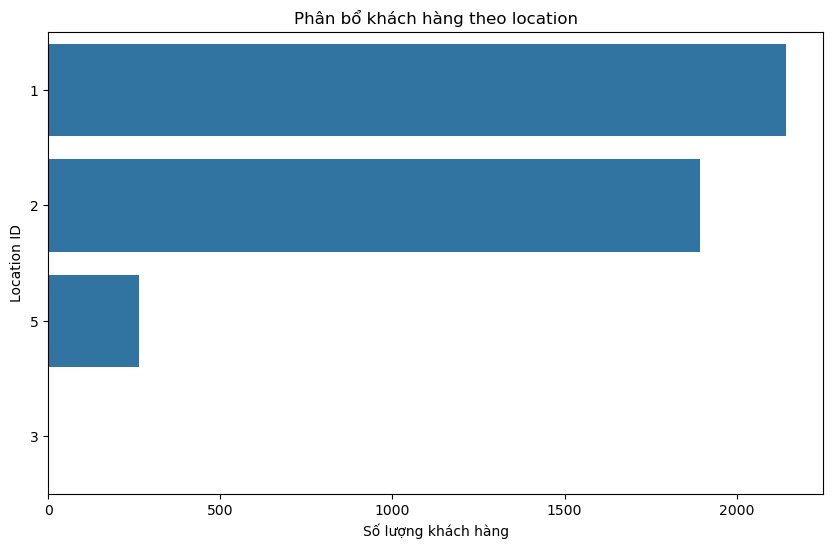

In [16]:
# Biểu đồ phân bổ khách hàng theo location
plt.figure(figsize=(10, 6))
sns.countplot(y='cus_location_id', data=full_data, order=full_data['cus_location_id'].value_counts().index)
plt.title('Phân bổ khách hàng theo location')
plt.xlabel('Số lượng khách hàng')
plt.ylabel('Location ID')
plt.show()

*Biểu đồ về phân bố khách hàng theo khu vực thì ta thấy khách hàng chủ yếu ở khu vực 1.*

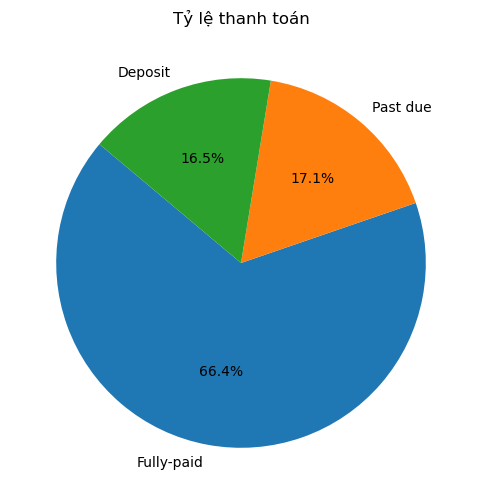

In [17]:
# Biểu đồ tỷ lệ thanh toán
payment_status_counts = full_data['payment_status'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(payment_status_counts, labels=payment_status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Tỷ lệ thanh toán')
plt.show()

*Biểu đồ tỷ lệ thanh toán của khách hàng ta thấy 66,4% số lượng khách hàng đã thanh toán, 16,5% khách hàng cọc trước và 17,1% khách hàng đã quá hạn thanh toán.*

C:\Users\Admin\AppData\Local\Temp\ipykernel_28464\4234484711.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  students_per_time = full_data.resample('M', on='created')['cus_id'].count()


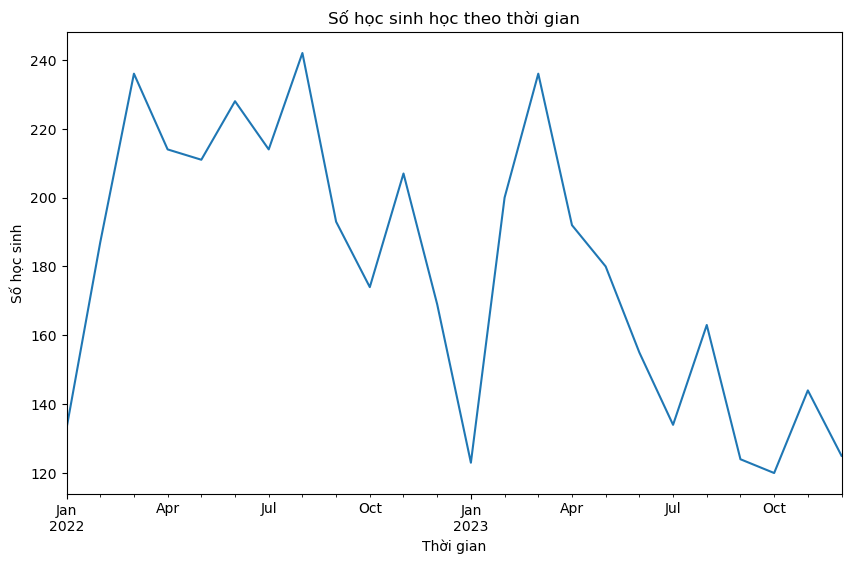

In [18]:
# Biểu đồ số học sinh học theo time-series
full_data['created'] = pd.to_datetime(full_data['created'])
students_per_time = full_data.resample('M', on='created')['cus_id'].count()
plt.figure(figsize=(10, 6))
students_per_time.plot(kind='line')
plt.title('Số học sinh học theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Số học sinh')
plt.show()

*Biểu đồ về số học sinh học theo thời gian thì ta thấy lượng học sinh cao nhất khi vào tháng 3 đến tháng 4.*

In [19]:
# Tỷ lệ quay lại học
returning_students = full_data[full_data['lead_id'].notna()]['cus_id'].nunique()
total_students = full_data['cus_id'].nunique()
return_rate = (returning_students / total_students) * 100
print(f"Tỷ lệ quay lại học: {return_rate:.2f}%")

Tỷ lệ quay lại học: 100.00%


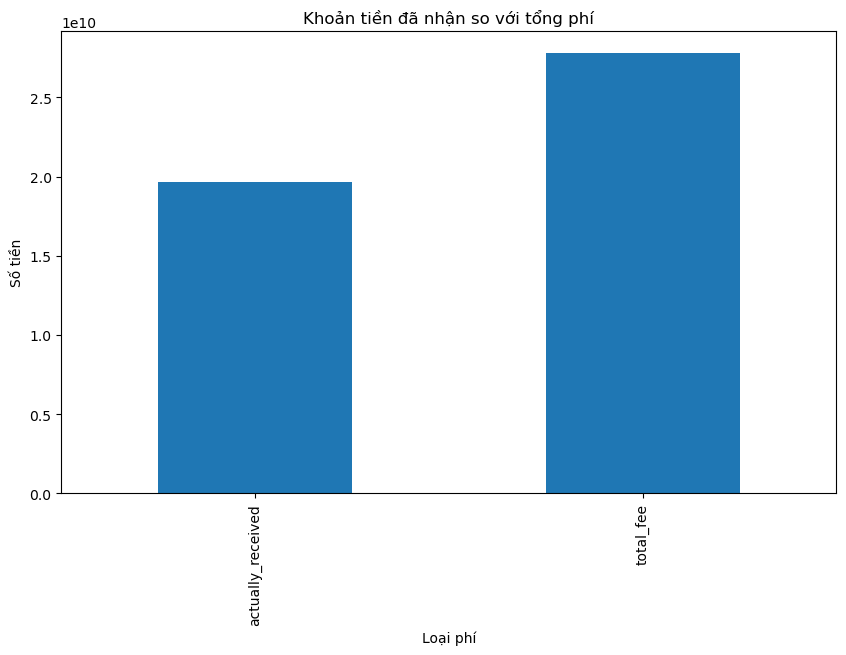

In [20]:
# Biểu đồ khoản tiền đã nhận so với tổng phí
received_vs_total = full_data[['actually_received', 'total_fee']].sum()
plt.figure(figsize=(10, 6))
received_vs_total.plot(kind='bar')
plt.title('Khoản tiền đã nhận so với tổng phí')
plt.xlabel('Loại phí')
plt.ylabel('Số tiền')
plt.show()

*Biểu đồ só sánh giữa khoản tiền đã nhận so với tổng phí thì ta thấy còn 1 khoản khá lớn chưa thanh toán của khách hàng.*

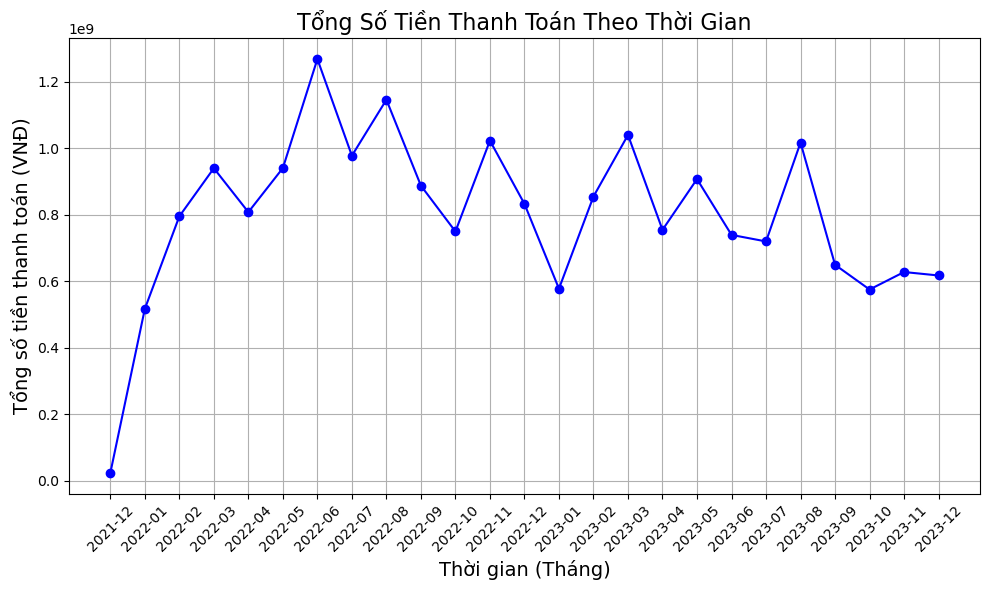

In [21]:
# Tổng hợp số tiền thanh toán theo từng tháng (có thể thay đổi cách gộp nhóm)
df_grouped = full_data.groupby(full_data['payment_date'].dt.strftime('%Y-%m'))['payment_amount'].sum()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(df_grouped.index, df_grouped.values, marker='o', linestyle='-', color='blue')

# Tùy chỉnh biểu đồ
plt.title('Tổng Số Tiền Thanh Toán Theo Thời Gian', fontsize=16)
plt.xlabel('Thời gian (Tháng)', fontsize=14)
plt.ylabel('Tổng số tiền thanh toán (VNĐ)', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

*Biểu đồ cho thấy sự dao động mạnh trong tổng số tiền thanh toán theo thời gian, với các đỉnh cao trong những tháng doanh thu tăng mạnh như tháng 2/2022 và các điểm thấp như tháng 1/2023.*

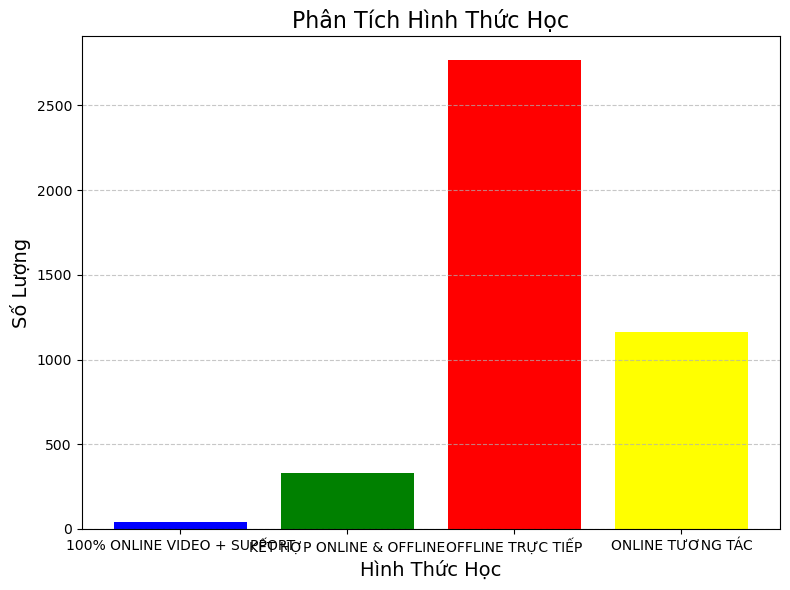

In [22]:
df_mode = full_data.copy()
# Nhóm dữ liệu và đếm số lượng (count) của từng hình thức học
mode_counts = df_mode.groupby('mode').size().reset_index(name='count')
# Vẽ biểu đồ cột
plt.figure(figsize=(8, 6))
plt.bar(mode_counts['mode'], mode_counts['count'], color=['blue', 'green', 'red', 'yellow'])
plt.title('Phân Tích Hình Thức Học', fontsize=16)
plt.xlabel('Hình Thức Học', fontsize=14)
plt.ylabel('Số Lượng', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

*Biểu đồ cho thấy:* 

*- Offline Trực Tiếp: Có số lượng học viên cao nhất, chứng tỏ đây là hình thức học được ưa chuộng nhất.*

*- Online Tương Tác: Có số lượng học viên khá cao, thể hiện sự phổ biến của hình thức học trực tuyến có sự tương tác.*

*- Học Online & Offline: Số lượng học viên ở mức trung bình, có thể cần cải thiện thêm bằng cách tối ưu hóa mô hình kết hợp.*

*- 100% Online Video + Support: Có số lượng học viên thấp nhất, điều này có thể do thiếu tính tương tác hoặc sự hấp dẫn đối với học viên.*

**Tình hình kinh doanh của công ty**:
1. **Hiệu quả theo khu vực**: Các khu vực có số lượng khách hàng lớn nhất sẽ là thị trường trọng điểm mà công ty nên tập trung nguồn lực để phát triển. Trong khi đó, các khu vực có ít khách hàng hơn cần được xem xét lại chiến lược marketing hoặc dịch vụ để cải thiện hiệu quả.
2. **Tình trạng thanh toán**: Tỷ lệ "Past due" chiếm 17.1%, điều này chỉ ra rằng một số lượng khách hàng chưa thanh toán đúng hạn. Tình trạng này có thể gây tác động tiêu cực đến dòng tiền của công ty, vì vậy cần có các biện pháp nhắc nhở hoặc khuyến khích thanh toán đúng hạn, như ưu đãi cho thanh toán sớm.
3. **Xu hướng học sinh**: Số lượng học sinh không đồng đều qua các giai đoạn thời gian, có thể phản ánh những thay đổi do mùa tuyển sinh, các chương trình học mới hoặc sự thay đổi trong chiến lược học phí. Việc phân tích chi tiết các yếu tố này sẽ giúp công ty xây dựng các chương trình thu hút và giữ chân học viên hiệu quả hơn.
4. **Thu nhập và chi phí**: Sự chênh lệch giữa khoản thực tế nhận được và tổng phí cho thấy một thách thức trong việc tối ưu hóa lợi nhuận. Công ty cần tìm hiểu kỹ nguyên nhân, chẳng hạn như chính sách giảm giá, chậm thanh toán hoặc các khoản nợ xấu, để có biện pháp khắc phục và nâng cao doanh thu.
5. **Tổng số tiền thanh toán theo thời gian**: Từ biểu đồ có thể liên quan đến mùa tuyển sinh, chiến dịch khuyến mãi hoặc các yếu tố ảnh hưởng từ thị trường. Công ty cần tận dụng các giai đoạn doanh thu cao để tối ưu hóa lợi nhuận và triển khai các chương trình phù hợp để thúc đẩy doanh thu trong giai đoạn thấp điểm.
6. **Hình thức học**: Công ty nên tập trung phát triển thêm hình thức học Offline Trực Tiếp và Online Tương Tác, đồng thời cải tiến các hình thức học khác bằng cách tăng cường trải nghiệm học tập, nâng cao sự tương tác hoặc đưa ra các chính sách ưu đãi phù hợp.


## Customer segmentation: RFM model

### Pre-processing

In [23]:
rpdate = pd.to_datetime("2024-01-01")

*Giả sử ngày hiện tại là 01/01/2024.*

In [24]:
cus_ft = full_data[full_data['created'] < rpdate].copy()
cus_acc_id = cus_ft[['cus_name', 'created', 'payment_amount', 'payment_status', 'payment_date']]

- Tạo bảng mới cus_ft để khi xử lý thì k ảnh hưởng tới bảng toàn bộ dữ liệu gốc.
- Tạo bảng cus_acc_id và lấy ra các trường muốn dùng để sử dụng.

### Recency

In [25]:
# ngày tạo tài khoản cuối cùng
cus_acc_id1 = cus_acc_id.copy()
cus_back = cus_acc_id1.groupby('cus_name')['payment_date'].max().reset_index()
cus_back = cus_back.rename({'payment_date':'Max_payment_date'}, axis = 1)

*Tạo 1 bảng để lấy ra khách hàng và ngày cuối cùng họ tạo tài khoản học.*

In [26]:
cus_acc_id = cus_acc_id.merge(cus_back, how = 'left')

*Merge với bảng muốn dùng để đánh giá chỉ tiêu Recency.*

In [27]:
cus_acc_id

,cus_name,created,payment_amount,payment_status,payment_date,Max_payment_date
0,Norma Fisher,2022-01-02,1500000,Fully-paid,2022-01-02,2022-01-02
1,Nicholas Nolan,2022-01-02,9000000,Fully-paid,2022-01-02,2022-01-02
2,Mary Smith,2022-01-03,8500000,Fully-paid,2022-01-03,2022-04-04
3,Kimberly Olsen,2022-01-04,8500000,Fully-paid,2022-01-04,2022-01-04
4,William Green,2022-01-04,14000000,Fully-paid,2021-12-15,2021-12-15
...,...,...,...,...,...,...
4299,Alex Martinez,2023-12-29,3500000,Deposit,2023-12-20,2023-12-20
4300,Elizabeth Carter,2023-12-29,12200000,Fully-paid,2023-12-20,2023-12-20
4301,Michelle Carter,2023-12-29,4130000,Fully-paid,2023-12-29,2023-12-29
4302,Joe Krueger,2023-12-30,3200000,Fully-paid,2023-12-30,2023-12-30


In [28]:
# group 0
out_range_365 = (cus_acc_id['Max_payment_date'] <= (rpdate - pd.Timedelta(days = 365))) 
# group 1
in_range_180to364 = (cus_acc_id['Max_payment_date'] >= (rpdate - pd.Timedelta(days = 364))) & (cus_acc_id['Max_payment_date'] < (rpdate - pd.Timedelta(days = 180)))
# group 2
in_range_60to179 = (cus_acc_id['Max_payment_date'] >= (rpdate - pd.Timedelta(days = 179))) & (cus_acc_id['Max_payment_date'] < (rpdate - pd.Timedelta(days = 60)))
# group 3
in_range_1to59 = (cus_acc_id['Max_payment_date'] >= (rpdate - pd.Timedelta(days = 59))) & (cus_acc_id['Max_payment_date'] < rpdate)
# group 4
out_range_60 = (cus_acc_id['Max_payment_date'] <= (rpdate - pd.Timedelta(days = 60)))


# RECENCY group:
## Past due
cus_acc_id.loc[cus_acc_id['payment_status'] == 'Past due', 'recency_grp'] = '0'
## Deposit
cus_acc_id.loc[(cus_acc_id['payment_status'] == 'Deposit') & out_range_60, 'recency_grp'] = '1'
cus_acc_id.loc[(cus_acc_id['payment_status'] == 'Deposit') & in_range_1to59, 'recency_grp'] = '2'
## Fully-paid
cus_acc_id.loc[(cus_acc_id['payment_status'] == 'Fully-paid') |  (cus_acc_id['Max_payment_date'] == cus_acc_id['payment_date']) & out_range_365, 'recency_grp'] = '0'
cus_acc_id.loc[(cus_acc_id['payment_status'] == 'Fully-paid') |  (cus_acc_id['Max_payment_date'] == cus_acc_id['payment_date']) & in_range_180to364, 'recency_grp'] = '1'
cus_acc_id.loc[(cus_acc_id['payment_status'] == 'Fully-paid') & (cus_acc_id['Max_payment_date'].isna()), 'recency_grp'] = '1'
cus_acc_id.loc[(cus_acc_id['payment_status'] == 'Fully-paid') |  (cus_acc_id['Max_payment_date'] == cus_acc_id['payment_date']) & in_range_60to179, 'recency_grp'] = '2'
cus_acc_id.loc[((cus_acc_id['payment_status'] == 'Fully-paid') |  (cus_acc_id['Max_payment_date'] == cus_acc_id['payment_date'])) & in_range_1to59, 'recency_grp'] = '3'


In [29]:
cus_acc_id

,cus_name,created,payment_amount,payment_status,payment_date,Max_payment_date,recency_grp
0,Norma Fisher,2022-01-02,1500000,Fully-paid,2022-01-02,2022-01-02,2
1,Nicholas Nolan,2022-01-02,9000000,Fully-paid,2022-01-02,2022-01-02,2
2,Mary Smith,2022-01-03,8500000,Fully-paid,2022-01-03,2022-04-04,2
3,Kimberly Olsen,2022-01-04,8500000,Fully-paid,2022-01-04,2022-01-04,2
4,William Green,2022-01-04,14000000,Fully-paid,2021-12-15,2021-12-15,2
...,...,...,...,...,...,...,...
4299,Alex Martinez,2023-12-29,3500000,Deposit,2023-12-20,2023-12-20,3
4300,Elizabeth Carter,2023-12-29,12200000,Fully-paid,2023-12-20,2023-12-20,3
4301,Michelle Carter,2023-12-29,4130000,Fully-paid,2023-12-29,2023-12-29,3
4302,Joe Krueger,2023-12-30,3200000,Fully-paid,2023-12-30,2023-12-30,3


*Ta đánh label cho các nhóm theo thứ tự 0, 1, 2, 3*:
- **Nhóm label 0**:
  + Là các tài khoản đã thanh toán nhưng có thời gian thanh toán hơn 1 năm.
  + Giá trị Max_payment_date bằng payment_date trong khoảng thời gian hơn 1 năm.
  + Các nhóm tài khoản đã quá hạn thanh toán.
- **Nhóm label 1**:
  + Là các nhóm đã thanh toán nhưng có thời gian thanh toán trong khoảng 180 đến 364 ngày.
  + Giá trị Max_payment_date bằng payment_date trong khoảng thời gian từ 180 đến 364 ngày.
  + Các nhóm tài khoản đang đặt trước quá 60 ngày.
- **Nhóm label 2**:
  + Là các nhóm đã thanh toán nhưng có thời gian thanh toán trong khoảng thời gian từ 60 ngày đến 364 ngày.
  + Giá trị Max_payment_date bằng payment_date trong khoảng thời gian từ 60 ngày đến 364 ngày.
  + Các nhóm tài khoản mới đặt trước từ 1 đến 59 ngày.
- **Nhóm label 3**:
  + Là các nhóm đã thanh toán nhưng có thời hạn thanh toán trong khoảng thời gian từ 1 đến 59 ngày.
  + Giá trị Max_payment_date bằng payment_date trong khoảng thời gian từ 1 đến 59 ngày.

### Frequency

In [30]:
# Frequency group:
## Past due
cus_acc_id.loc[cus_acc_id['payment_status'] == 'Past due', 'frequency_grp'] = '0'
## Deposit
cus_acc_id.loc[(cus_acc_id['payment_status'] == 'Deposit') & out_range_60, 'frequency_grp'] = '1'
cus_acc_id.loc[(cus_acc_id['payment_status'] == 'Deposit') & in_range_1to59, 'frequency_grp'] = '2'

*Ta đánh label trước cho các nhóm 0, 1, 2*:
- **Nhóm label 0**:
  + Các nhóm tài khoản đã quá hạn thanh toán.
- **Nhóm label 1**:
  + Các nhóm tài khoản đang đặt trước quá 60 ngày.
- **Nhóm label 2**:
  + Các nhóm tài khoản mới đặt trước từ 1 đến 59 ngày. đến 59 ngày.

In [31]:
cus_ft1 = cus_ft.copy()
cnt_created = cus_ft1.groupby('cus_name').agg({'created':'count', 'payment_amount':'sum'})

*Tạo bảng mới để tạo các trường về tổng ngày tạo và tổng khoản đã thanh toán của khách hàng.*

In [32]:
cnt_created = cnt_created.rename({'created':'TOTAL_CREATED', 'payment_amount':'TOTAL_PAYMENT_AMOUNT'}, axis = 1)
cnt_created = cnt_created.reset_index()

*Đổi tên lại các trường mới tạo thành tổng ngày tạo và tổng số tiền đã thanh toán.*

In [33]:
cus_acc_id = cus_acc_id.merge(cnt_created[['cus_name', 'TOTAL_CREATED','TOTAL_PAYMENT_AMOUNT']], how = 'left')

*Merge với bảng dùng để đánh giá chỉ tiêu Frequency*

In [34]:
cus_acc_id

,cus_name,created,payment_amount,payment_status,payment_date,Max_payment_date,recency_grp,frequency_grp,TOTAL_CREATED,TOTAL_PAYMENT_AMOUNT
0,Norma Fisher,2022-01-02,1500000,Fully-paid,2022-01-02,2022-01-02,2,NaN,1,1500000
1,Nicholas Nolan,2022-01-02,9000000,Fully-paid,2022-01-02,2022-01-02,2,NaN,1,9000000
2,Mary Smith,2022-01-03,8500000,Fully-paid,2022-01-03,2022-04-04,2,NaN,2,16000000
3,Kimberly Olsen,2022-01-04,8500000,Fully-paid,2022-01-04,2022-01-04,2,NaN,1,8500000
4,William Green,2022-01-04,14000000,Fully-paid,2021-12-15,2021-12-15,2,NaN,1,14000000
...,...,...,...,...,...,...,...,...,...,...
4299,Alex Martinez,2023-12-29,3500000,Deposit,2023-12-20,2023-12-20,3,2,1,3500000
4300,Elizabeth Carter,2023-12-29,12200000,Fully-paid,2023-12-20,2023-12-20,3,NaN,2,16499000
4301,Michelle Carter,2023-12-29,4130000,Fully-paid,2023-12-29,2023-12-29,3,NaN,1,4130000
4302,Joe Krueger,2023-12-30,3200000,Fully-paid,2023-12-30,2023-12-30,3,NaN,1,3200000


In [35]:
cus_acc_id['acc_lifetime'] = (rpdate - cus_acc_id['created'])/pd.Timedelta(days = 1)
# accounts that have an open create day in last 1 year upto report date
cus_acc_id['flag_adj'] = cus_acc_id['acc_lifetime']<=365

- *Tính toán khoảng thời gian từ lúc tạo đến ngày hiện tại của khách hàng.* 
- *Lọc những tài khoản có khoảng thời gian nhỏ hơn hoặc bằng 365 ngày.*

In [36]:
cus_acc_id['TOTAL_CREATED'] = cus_acc_id['TOTAL_CREATED'].astype(float)
cus_acc_id.loc[cus_acc_id['flag_adj'], 'TOTAL_CREATED'] = 365 / cus_acc_id.loc[cus_acc_id['flag_adj'], 'acc_lifetime'] * cus_acc_id.loc[cus_acc_id['flag_adj'], 'TOTAL_CREATED']

- *Chuyển kiểu dữ liệu của trường **TOTAL_CREATED** về dạng float để tính toán.*
- *Tính trong 1 năm thì khách hàng sẽ tạo tài khoản bao lần.*

In [37]:
crd_count = cus_acc_id.loc[cus_acc_id['payment_status'] == 'Fully-paid', 'TOTAL_CREATED']
cus_acc_id.loc[(cus_acc_id['payment_status'] == 'Fully-paid') & (cus_acc_id['TOTAL_CREATED'] <= crd_count.quantile(0.5)), 'frequency_grp'] = '1'
cus_acc_id.loc[
    (cus_acc_id['payment_status'] == 'Fully-paid')
    & (cus_acc_id['TOTAL_CREATED'] > crd_count.quantile(0.5))
    & (cus_acc_id['TOTAL_CREATED'] <= crd_count.quantile(0.95))
    , 'frequency_grp'] = '2'
cus_acc_id.loc[(cus_acc_id['payment_status'] == 'Fully-paid') & (cus_acc_id['TOTAL_CREATED'] > crd_count.quantile(0.95)), 'frequency_grp'] = '3'

*Ta đánh label cho các nhóm còn lại 1, 2, 3*:
- **Nhóm label 1**:
  + Gồm các tài khoản đã thanh toán và có **TOTAL_CREATED** nhỏ hơn hoặc bằng phân vị 50%.
- **Nhóm label 2**:
  + Gồm các tài khoản đã thanh toán và có **TOTAL_CREATED** lớn hơn phân vị 50% và nhỏ hơn hoặc bằng phân vị 95%.
- **Nhóm label 3**:
  + Gồm các tài khoản đã thanh toán và có **TOTAL_CREATED** lớn hơn phân vị 95%.

In [38]:
cus_acc_id

,cus_name,created,payment_amount,payment_status,payment_date,Max_payment_date,recency_grp,frequency_grp,TOTAL_CREATED,TOTAL_PAYMENT_AMOUNT,acc_lifetime,flag_adj
0,Norma Fisher,2022-01-02,1500000,Fully-paid,2022-01-02,2022-01-02,2,1,1.000000,1500000,729.0,False
1,Nicholas Nolan,2022-01-02,9000000,Fully-paid,2022-01-02,2022-01-02,2,1,1.000000,9000000,729.0,False
2,Mary Smith,2022-01-03,8500000,Fully-paid,2022-01-03,2022-04-04,2,2,2.000000,16000000,728.0,False
3,Kimberly Olsen,2022-01-04,8500000,Fully-paid,2022-01-04,2022-01-04,2,1,1.000000,8500000,727.0,False
4,William Green,2022-01-04,14000000,Fully-paid,2021-12-15,2021-12-15,2,1,1.000000,14000000,727.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4299,Alex Martinez,2023-12-29,3500000,Deposit,2023-12-20,2023-12-20,3,2,121.666667,3500000,3.0,True
4300,Elizabeth Carter,2023-12-29,12200000,Fully-paid,2023-12-20,2023-12-20,3,3,243.333333,16499000,3.0,True
4301,Michelle Carter,2023-12-29,4130000,Fully-paid,2023-12-29,2023-12-29,3,3,121.666667,4130000,3.0,True
4302,Joe Krueger,2023-12-30,3200000,Fully-paid,2023-12-30,2023-12-30,3,3,182.500000,3200000,2.0,True


### Monetary

In [39]:
cus_acc_id['TOTAL_PAYMENT_AMOUNT'] = cus_acc_id['TOTAL_PAYMENT_AMOUNT'].astype(float)
cus_acc_id.loc[cus_acc_id['flag_adj'], 'TOTAL_PAYMENT_AMOUNT'] = 365 / cus_acc_id.loc[cus_acc_id['flag_adj'], 'acc_lifetime'] * cus_acc_id.loc[cus_acc_id['flag_adj'], 'TOTAL_PAYMENT_AMOUNT']

- *Chuyển kiểu dữ liệu của trường **TOTAL_PAYMENT_AMOUNT** về dạng float để tính toán.*
- *Tính trong 1 năm thì khách hàng sẽ chi trả bao nhiêu tiền.*

In [40]:
# Monetary group:
## Past due
cus_acc_id.loc[cus_acc_id['payment_status'] == 'Past due', 'monetory_grp'] = '0'
## Deposit
cus_acc_id.loc[(cus_acc_id['payment_status'] == 'Deposit') & out_range_60, 'monetory_grp'] = '1'
cus_acc_id.loc[(cus_acc_id['payment_status'] == 'Deposit') & in_range_1to59, 'monetory_grp'] = '2'

*Ta đánh label trước cho các nhóm 0, 1, 2*:
- **Nhóm label 0**:
  + Các nhóm tài khoản đã quá hạn thanh toán.
- **Nhóm label 1**:
  + Các nhóm tài khoản đang đặt trước quá 60 ngày.
- **Nhóm label 2**:
  + Các nhóm tài khoản mới đặt trước từ 1 đến 59 ngày.

In [41]:
crd_count = cus_acc_id.loc[cus_acc_id['payment_status'] == 'Fully-paid', 'TOTAL_PAYMENT_AMOUNT']
cus_acc_id.loc[(cus_acc_id['payment_status'] == 'Fully-paid') & (cus_acc_id['TOTAL_PAYMENT_AMOUNT'] <= crd_count.quantile(0.5)), 'monetory_grp'] = '1'
cus_acc_id.loc[
    (cus_acc_id['payment_status'] == 'Fully-paid') 
    & (cus_acc_id['TOTAL_PAYMENT_AMOUNT'] > crd_count.quantile(0.5))
    & (cus_acc_id['TOTAL_PAYMENT_AMOUNT'] <= crd_count.quantile(0.95))
    , 'monetory_grp'] = '2'
cus_acc_id.loc[(cus_acc_id['payment_status'] == 'Fully-paid') & (cus_acc_id['TOTAL_PAYMENT_AMOUNT'] > crd_count.quantile(0.95)), 'monetory_grp'] = '3'

*Ta đánh label cho các nhóm còn lại 1, 2, 3*:
- **Nhóm label 1**:
  + Gồm các tài khoản đã thanh toán và có **TOTAL_PAYMENT_AMOUNT** nhỏ hơn hoặc bằng phân vị 50%.
- **Nhóm label 2**:
  + Gồm các tài khoản đã thanh toán và có **TOTAL_PAYMENT_AMOUNT** lớn hơn phân vị 50% và nhỏ hơn hoặc bằng phân vị 95%.
- **Nhóm label 3**:
  + Gồm các tài khoản đã thanh toán và có **TOTAL_PAYMENT_AMOUNT** lớn hơn phân vị 95%.

## Combination

In [42]:
cus_acc_id['RFM'] = cus_acc_id['recency_grp'] + cus_acc_id['frequency_grp'] + cus_acc_id['monetory_grp']

*Tạo trường chỉ tiêu RFM để phân loại khách hàng.*

In [43]:
vip = ['233', '333']
promising = ['323', '313', '223', '213', '133', '123']
loyal = ['332', '331', '232', '231']
regular = ['330', '322', '321', '320', '312', '311','303', '230', '222', '221', '212', '211', '203', '132', '122', '113']
sleeping = ['310', '302', '301', '300', '220', '210', '202', '201', '131', '130', '121', '120', '112', '111', '110','103', '102',  '101', '100', '033', '032', '031', '023', '022', '021']
churn = ['200', '030', '020', '013', '012', '011', '010', '003', '002', '001', '000']
# Áp dụng các nhóm vào dataframe
cus_acc_id.loc[cus_acc_id['RFM'].isin(vip), 'label'] = 'VIP'
cus_acc_id.loc[cus_acc_id['RFM'].isin(promising), 'label'] = 'PROMISING'
cus_acc_id.loc[cus_acc_id['RFM'].isin(loyal), 'label'] = 'LOYAL'
cus_acc_id.loc[cus_acc_id['RFM'].isin(regular), 'label'] = 'REGULAR'
cus_acc_id.loc[cus_acc_id['RFM'].isin(sleeping), 'label'] = 'SLEEPING'
cus_acc_id.loc[cus_acc_id['RFM'].isin(churn), 'label'] = 'CHURN'

*Phân loại khách hàng theo 3 chỉ tiêu **recency**, **frequency**, **monetary** ta được 6 cấp bậc: **VIP**, **PROMISSING**, **LOYAL**, **REGULAR**, **SLEEPING**, **CHURN**.*

In [44]:
cus_acc_id['label'].count()

4304

In [45]:
cus_acc_id['label'].value_counts()

label
REGULAR      2731
CHURN         850
SLEEPING      540
VIP           100
PROMISING      43
LOYAL          40
Name: count, dtype: int64

In [46]:
cus_acc_id

,cus_name,created,payment_amount,payment_status,payment_date,Max_payment_date,recency_grp,frequency_grp,TOTAL_CREATED,TOTAL_PAYMENT_AMOUNT,acc_lifetime,flag_adj,monetory_grp,RFM,label
0,Norma Fisher,2022-01-02,1500000,Fully-paid,2022-01-02,2022-01-02,2,1,1.000000,1.500000e+06,729.0,False,1,211,REGULAR
1,Nicholas Nolan,2022-01-02,9000000,Fully-paid,2022-01-02,2022-01-02,2,1,1.000000,9.000000e+06,729.0,False,2,212,REGULAR
2,Mary Smith,2022-01-03,8500000,Fully-paid,2022-01-03,2022-04-04,2,2,2.000000,1.600000e+07,728.0,False,2,222,REGULAR
3,Kimberly Olsen,2022-01-04,8500000,Fully-paid,2022-01-04,2022-01-04,2,1,1.000000,8.500000e+06,727.0,False,2,212,REGULAR
4,William Green,2022-01-04,14000000,Fully-paid,2021-12-15,2021-12-15,2,1,1.000000,1.400000e+07,727.0,False,2,212,REGULAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4299,Alex Martinez,2023-12-29,3500000,Deposit,2023-12-20,2023-12-20,3,2,121.666667,4.258333e+08,3.0,True,2,322,REGULAR
4300,Elizabeth Carter,2023-12-29,12200000,Fully-paid,2023-12-20,2023-12-20,3,3,243.333333,2.007378e+09,3.0,True,3,333,VIP
4301,Michelle Carter,2023-12-29,4130000,Fully-paid,2023-12-29,2023-12-29,3,3,121.666667,5.024833e+08,3.0,True,3,333,VIP
4302,Joe Krueger,2023-12-30,3200000,Fully-paid,2023-12-30,2023-12-30,3,3,182.500000,5.840000e+08,2.0,True,3,333,VIP


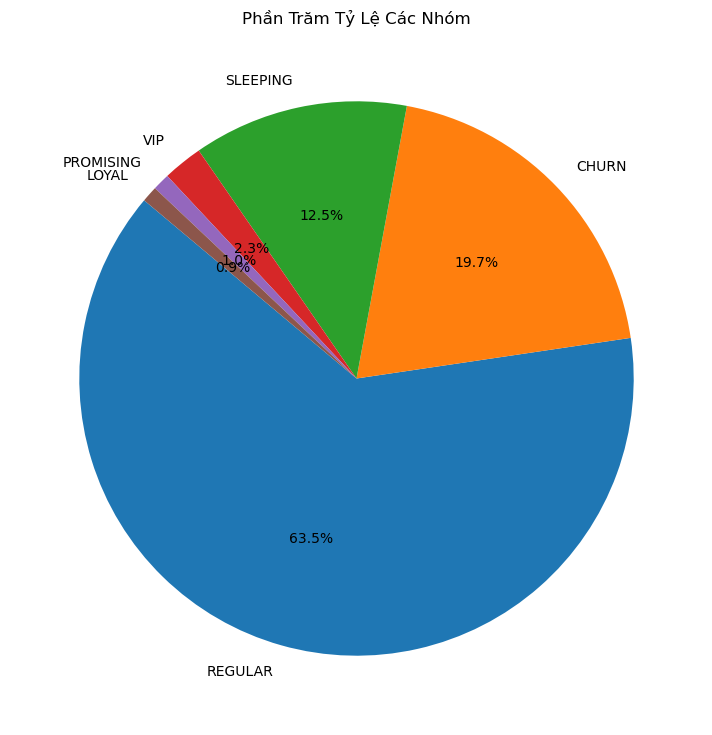

In [47]:
label_counts = cus_acc_id['label'].value_counts()
label_percentages = label_counts / label_counts.sum() * 100
# Vẽ biểu đồ hình tròn
plt.figure(figsize=(13,9))
plt.pie(label_percentages, labels=label_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Phần Trăm Tỷ Lệ Các Nhóm')
plt.show()

**Đây là các cách tiếp cận được cá nhân hóa dành riêng cho từng phân khúc khách hàng mua khóa học và học tập:**
1. **REGULAR (63.5%)**
   - **Đặc điểm**: Học viên thường xuyên đăng ký khóa học nhưng chưa đạt đến mức độ trung thành bền vững.
   - **Chiến lược**:
     - **Gợi ý khóa học tiếp theo**: Sử dụng dữ liệu học tập của họ để đề xuất những khóa học liên quan hoặc bổ sung kiến thức.
     - **Chương trình khuyến khích học tiếp**: Tặng mã giảm giá cho các khóa học nâng cao hoặc cấp độ tiếp theo.
     - **Cung cấp tài nguyên bổ trợ miễn phí**: Như tài liệu, bài kiểm tra mẫu hoặc video hướng dẫn để tăng sự cam kết.

2. **CHURN (19.7%)**
   - **Đặc điểm**: Học viên từng mua khóa học nhưng đã ngừng học hoặc không tiếp tục đăng ký khóa mới.
   - **Chiến lược**:
     - **Chiến dịch tái kích hoạt**: Gửi email cá nhân hóa về các thay đổi, cải tiến trong nội dung khóa học để tạo sự hứng thú quay lại.
     - **Cung cấp khóa học**: Cung cấp khóa học miễn phí ngắn hạn hoặc bài giảng mẫu để thu hút họ quay trở lại.
     - **Khảo sát lý do rời bỏ**: Hiểu rõ lý do học viên ngừng tham gia và điều chỉnh dịch vụ/phương pháp giảng dạy.

3. **SLEEPING (12.5%)**
   - **Đặc điểm**: Học viên ít tham gia học sau khi mua khóa học hoặc học không đều đặn.
   - **Chiến lược**:
     - **Nhắc nhở tham gia học tập**: Gửi thông báo tự động hoặc email nhắc nhở về tiến độ học.
     - **Kích thích qua chương trình thưởng điểm**: Học viên nhận được phần thưởng nhỏ khi hoàn thành bài học.
     - **Cung cấp nội dung thúc đẩy**: Ví dụ, video truyền cảm hứng từ những người thành công sau khi tham gia khóa học.

4. **PROMISING (2.3%)**
   - **Đặc điểm**: Học viên tiềm năng đang bắt đầu tham gia học tập một cách đều đặn.
   - **Chiến lược**:
     - **Đầu tư vào cố vấn cá nhân hóa**: Mời họ tham gia các buổi tư vấn học tập để định hướng rõ ràng hơn.
     - **Tăng cường trải nghiệm bằng nội dung độc quyền**, ví dụ như bài giảng trực tiếp hoặc buổi hỏi đáp với chuyên gia.
     - **Giảm giá khóa học nâng cao**: Khuyến khích họ tiếp tục tham gia các lộ trình phát triển chuyên sâu.

5. **LOYAL (0.9%)**
   - **Đặc điểm**: Học viên trung thành, thường xuyên học và giới thiệu khóa học cho người khác.
   - **Chiến lược**:
     - **Xây dựng chương trình đối tác học tập**: Mời họ làm đại sứ thương hiệu hoặc hướng dẫn cộng đồng học viên mới.
     - **Cung cấp ưu đãi độc quyền**: Giảm giá trọn gói các khóa học hoặc truy cập miễn phí các buổi học đặc biệt.
     - **Gửi thư cảm ơn hoặc phần quà tinh thần**, như giấy chứng nhận hoặc bằng khen cho sự cam kết học tập.

6. **VIP (0.1%)**
   - **Đặc điểm**: Nhóm học viên đóng góp lớn, có thể là người học tích cực nhất hoặc đem lại giá trị cao qua việc giới thiệu.
   - **Chiến lược**:
     - **Cung cấp hỗ trợ ưu tiên**: Hotline riêng, giải đáp 1:1 với giảng viên hoặc quyền lợi linh hoạt khi tham gia học.
     - **Mời họ tham gia sự kiện đặc biệt**, như hội thảo với chuyên gia đầu ngành hoặc giao lưu cùng giảng viên.
     - **Tôn vinh thành tựu học tập**: Chia sẻ câu chuyện thành công của họ qua các kênh truyền thông của doanh nghiệp.

## Download data to computer

In [48]:
# cus_acc_id.to_excel('F:/Test DA (MCI)/data/customer_combination.xlsx', index=False)

In [49]:
# full_data.to_excel('F:/Test DA (MCI)/data/data_customer.xlsx', index=False)